## 导入模块

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## 读取数据集

In [2]:
data = pd.read_csv('cbg_patterns.csv')

## 查看数据前五行

In [3]:
print(data.head())

   census_block_group  date_range_start  date_range_end  raw_visit_count  \
0        1.005951e+10        1538352000      1541030400          75122.0   
1        1.009051e+10        1538352000      1541030400          95649.0   
2        1.047957e+10        1538352000      1541030400          14009.0   
3        1.069040e+10        1538352000      1541030400         128169.0   
4        1.073011e+10        1538352000      1541030400          51453.0   

   raw_visitor_count                                  visitor_home_cbgs  \
0            18314.0  {"010059501003":127,"010059509001":111,"010059...   
1            38942.0  {"010730113021":210,"010090506022":205,"010090...   
2             3039.0              {"010479567011":67,"010479567021":60}   
3            25418.0  {"010690402013":370,"010690402011":322,"010690...   
4             9499.0  {"010090507001":183,"010730113021":167,"010730...   

                                   visitor_work_cbgs  distance_from_home  \
0  {"01005950100

## 查看数据类型

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220734 non-null  float64
 1   date_range_start          220735 non-null  int64  
 2   date_range_end            220735 non-null  int64  
 3   raw_visit_count           220629 non-null  float64
 4   raw_visitor_count         220629 non-null  float64
 5   visitor_home_cbgs         220735 non-null  object 
 6   visitor_work_cbgs         220735 non-null  object 
 7   distance_from_home        220518 non-null  float64
 8   related_same_day_brand    220735 non-null  object 
 9   related_same_month_brand  220735 non-null  object 
 10  top_brands                220735 non-null  object 
 11  popularity_by_hour        220735 non-null  object 
 12  popularity_by_day         220735 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory us

## 切片其中几列做分析

In [5]:
df = data[['census_block_group','raw_visit_count','raw_visitor_count','distance_from_home']]
df.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home
0,1.005951e+10,75122.0,18314.0,194724.0
1,1.009051e+10,95649.0,38942.0,120587.0
2,1.047957e+10,14009.0,3039.0,67774.0
3,1.069040e+10,128169.0,25418.0,42684.0
4,1.073011e+10,51453.0,9499.0,18878.0


## 设置索引列

In [6]:
df.set_index('census_block_group',inplace=True)
df.head()

,raw_visit_count,raw_visitor_count,distance_from_home
census_block_group,,,
1.005951e+10,75122.0,18314.0,194724.0
1.009051e+10,95649.0,38942.0,120587.0
1.047957e+10,14009.0,3039.0,67774.0
1.069040e+10,128169.0,25418.0,42684.0
1.073011e+10,51453.0,9499.0,18878.0


## 描述性统计

In [7]:
df.describe()

,raw_visit_count,raw_visitor_count,distance_from_home
count,2.206290e+05,2.206290e+05,2.205180e+05
mean,4.793066e+04,1.182032e+04,3.511280e+04
std,6.252655e+04,3.045832e+04,9.973193e+04
min,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.704200e+04,3.430000e+03,8.584000e+03
50%,3.064000e+04,6.541000e+03,1.461400e+04
75%,5.667800e+04,1.309900e+04,3.139775e+04
max,7.179900e+06,6.113949e+06,6.297845e+06


## 查看缺失值情况

In [8]:
1 - (df.describe().T["count"]) / len(df)

raw_visit_count       0.000480
raw_visitor_count     0.000480
distance_from_home    0.000983
Name: count, dtype: float64

看到三个特征都存在缺失值

## 画直方图

raw_visit_count


D:\soft\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\soft\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


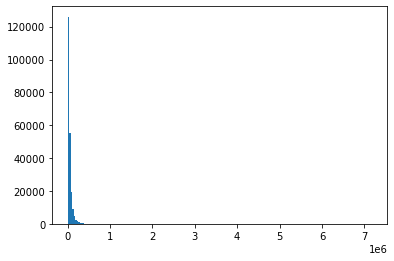

raw_visitor_count


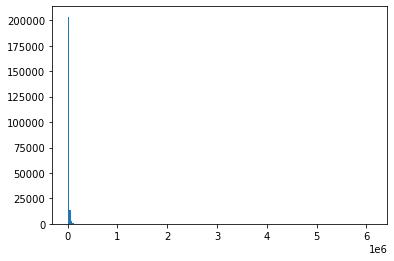

distance_from_home


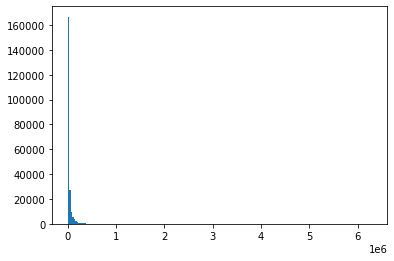

In [9]:
for i in df.columns:
    print(i)
    plt.hist(data[i], bins=200)
    plt.show()

## 画箱线图

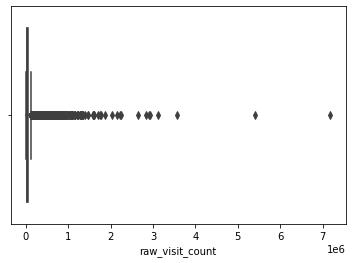

In [10]:
sns.boxplot(x='raw_visit_count',data=df)

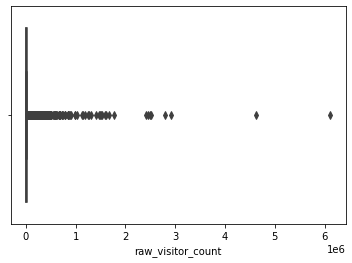

In [11]:
sns.boxplot(x='raw_visitor_count',data=df)

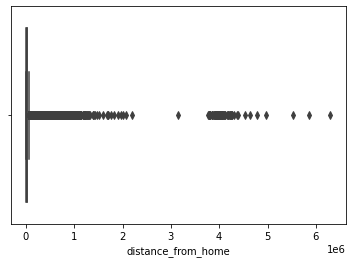

In [12]:
sns.boxplot(x='distance_from_home',data=df)    

## 对raw_visit_count进行缺失值处理

## 第一种方法  删除缺失值

处理前

In [13]:
data['raw_visit_count'].describe()
1 - (data['raw_visit_count'].describe().T["count"]) / len(data)

0.0004802138310644466

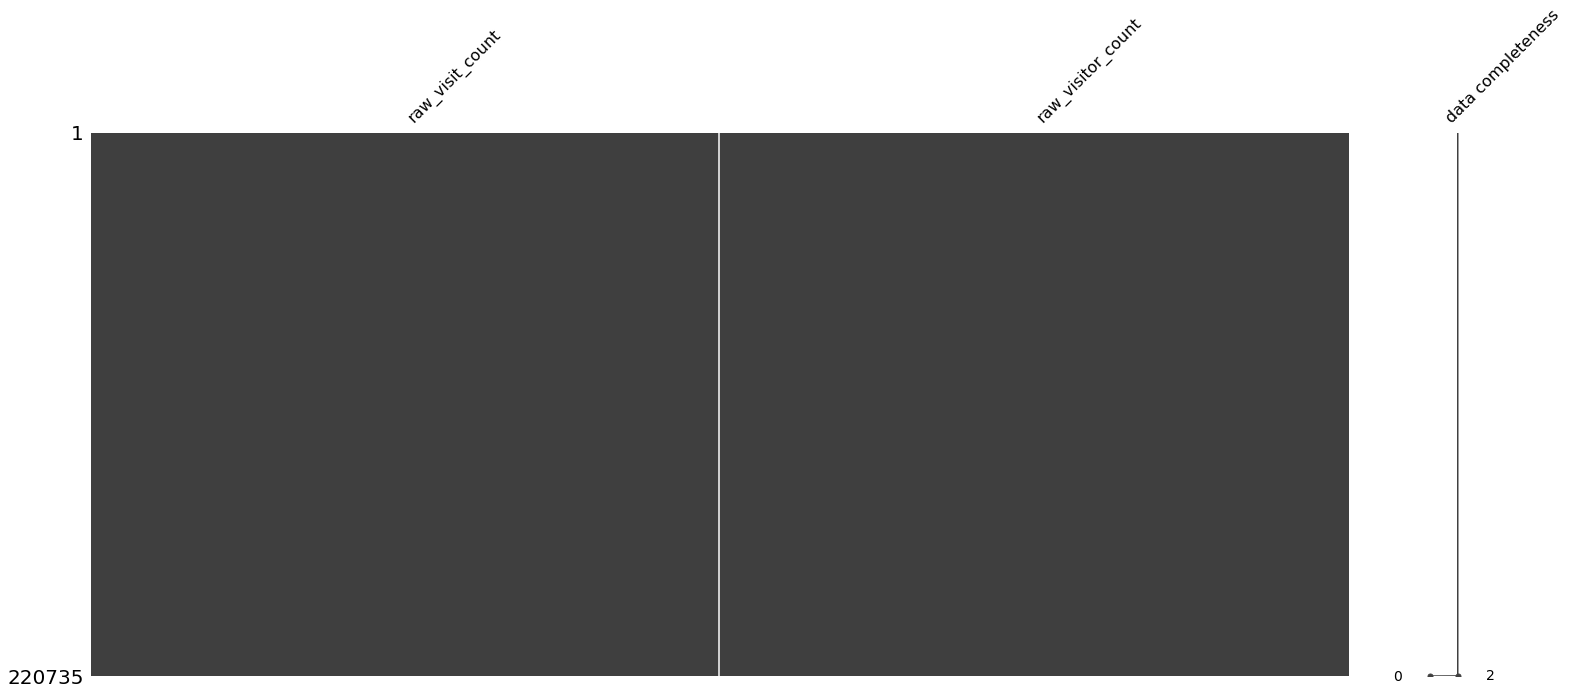

In [14]:
msno.matrix(data[['raw_visit_count','raw_visitor_count']], labels=True)

处理后

In [15]:
df['raw_visit_count'].dropna(inplace=True)

D:\soft\Anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [16]:
1 - (df['raw_visit_count'].describe().T["count"]) / len(df['raw_visit_count'])

0.0

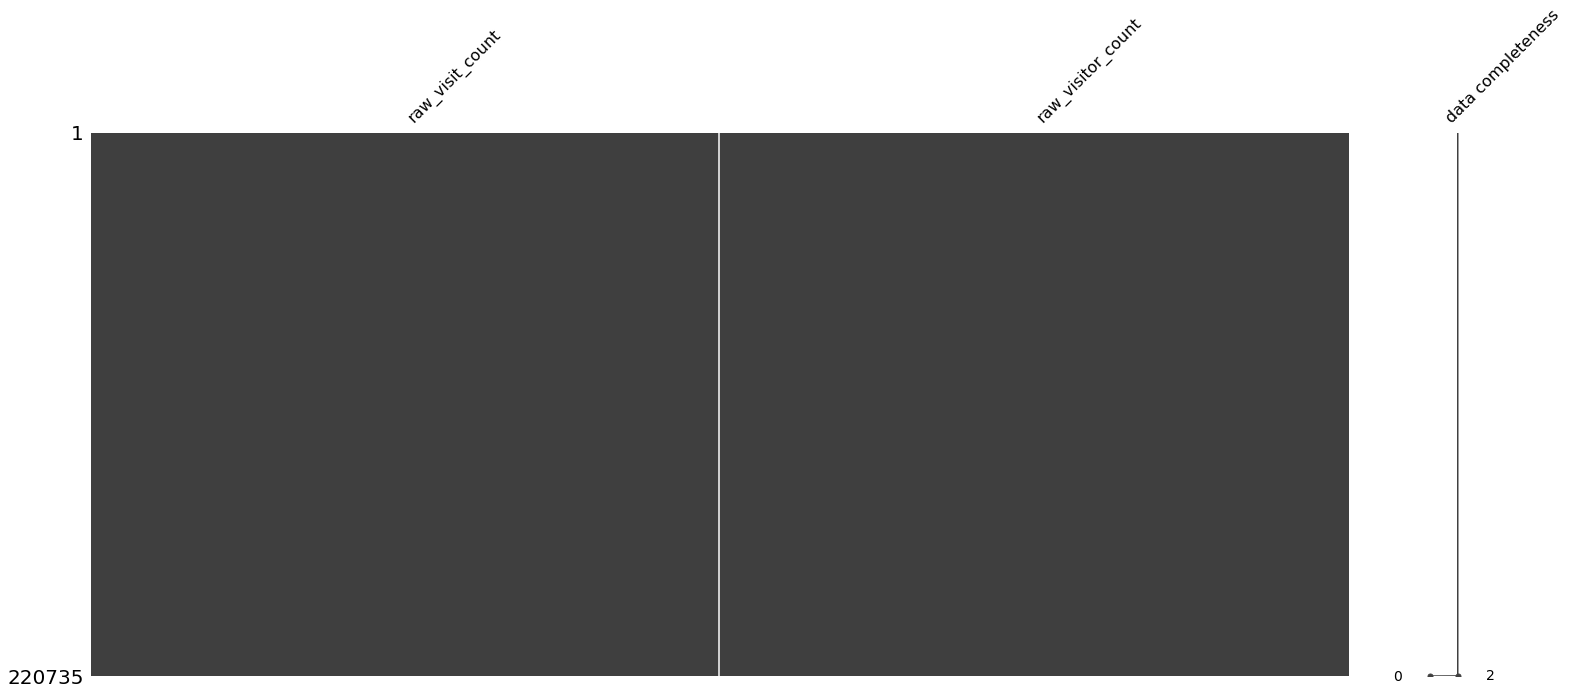

In [17]:
msno.matrix(df[['raw_visit_count','raw_visitor_count']], labels=True)

## 第二种方法 使用众数填补缺失值

处理前

In [18]:
data['raw_visit_count'].describe()
1 - (data['raw_visit_count'].describe().T["count"]) / len(data)

0.0004802138310644466

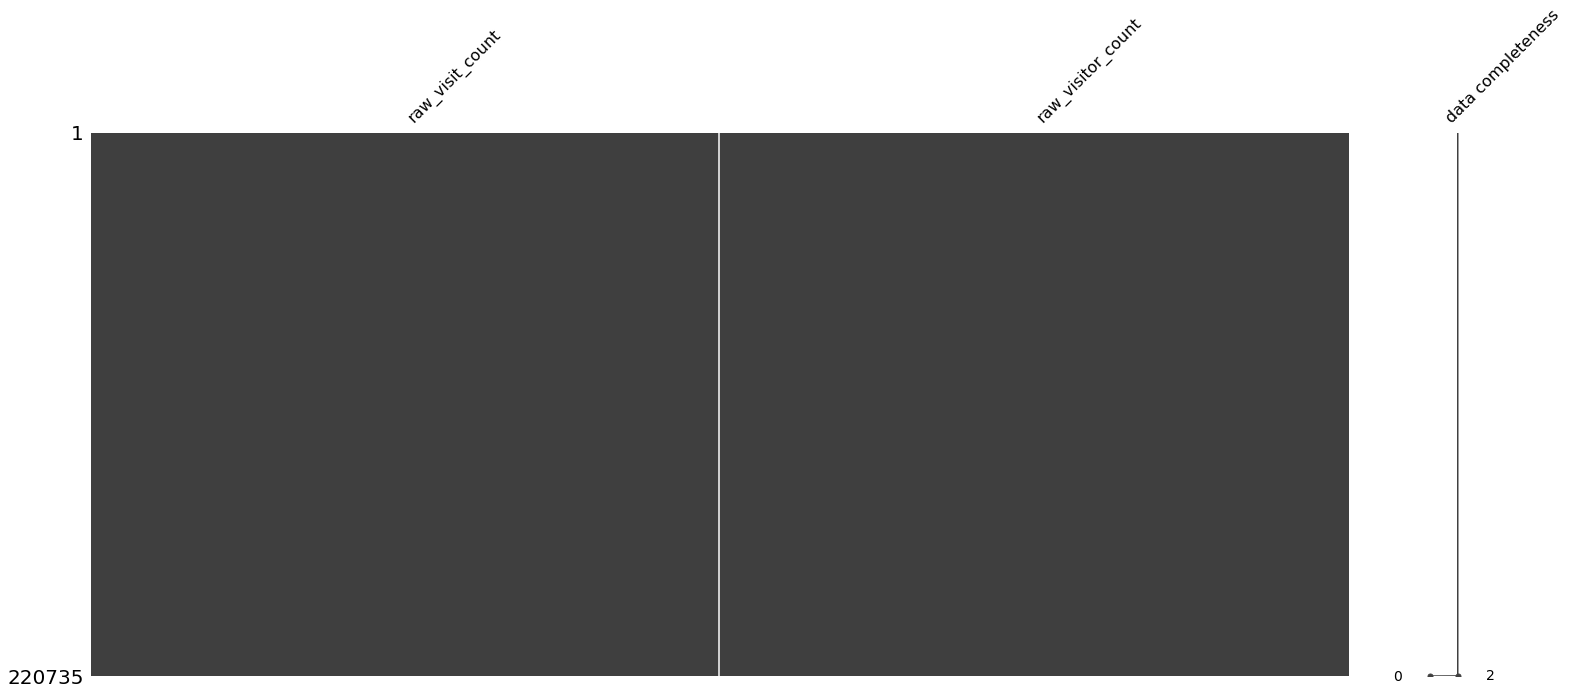

In [19]:
msno.matrix(data[['raw_visit_count','raw_visitor_count']], labels=True)

处理后

In [20]:
mod = data['raw_visit_count'].mode()[0]
mod

24531.0

In [21]:
df['raw_visit_count'] = df['raw_visit_count'].fillna(mod)

D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
1 - (df['raw_visit_count'].describe().T["count"]) / len(df['raw_visit_count'])

0.0004802138310644466

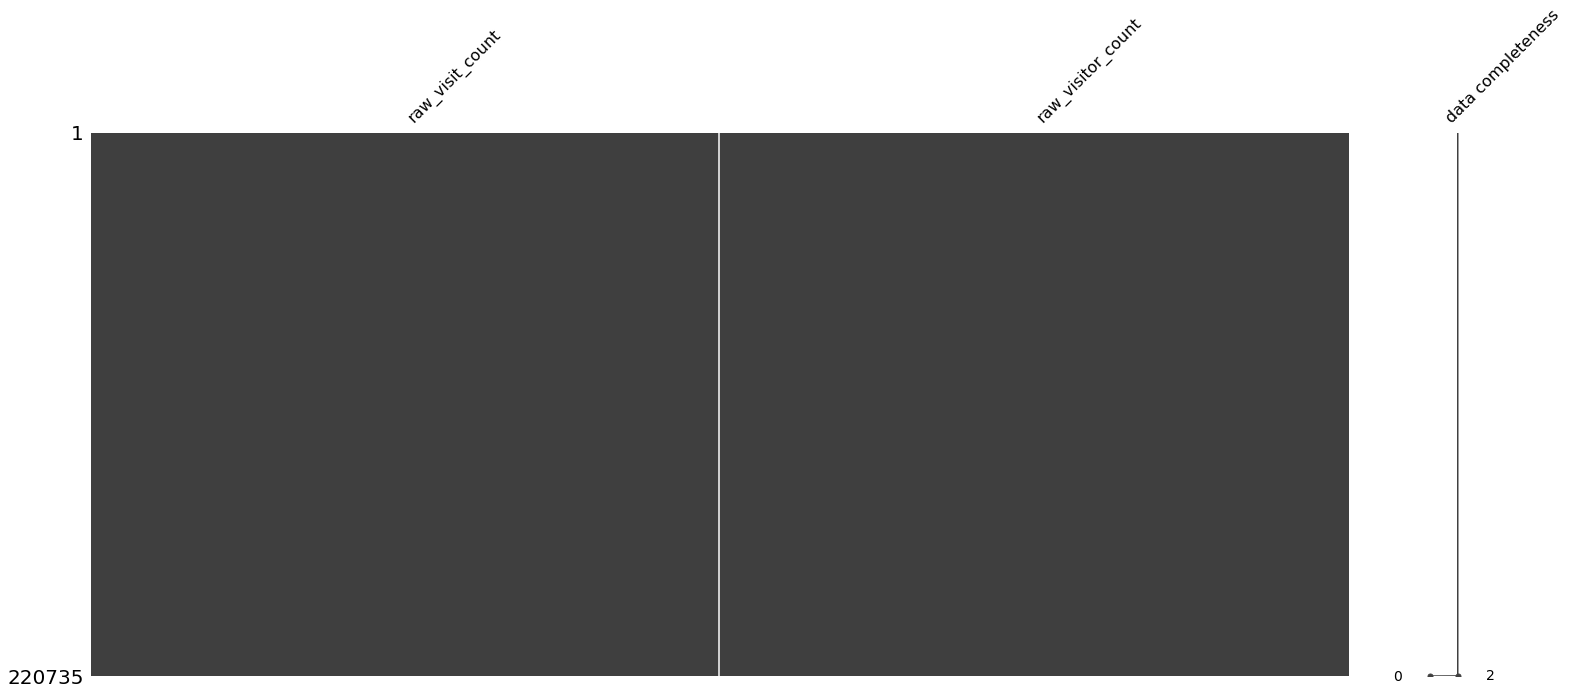

In [23]:
msno.matrix(df[['raw_visit_count','raw_visitor_count']], labels=True)

## 第三种方法 使用属性的相关关系填补缺失值

属性之间相关性分析

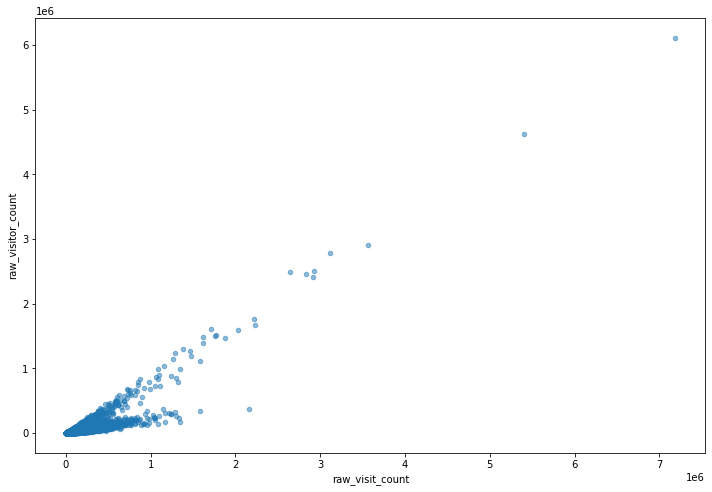

In [24]:
data.plot(kind="scatter",x="raw_visit_count",y="raw_visitor_count",alpha=0.5,figsize=(12,8))

处理前

In [25]:
data['raw_visit_count'].describe()
1 - (data['raw_visit_count'].describe().T["count"]) / len(data)

0.0004802138310644466

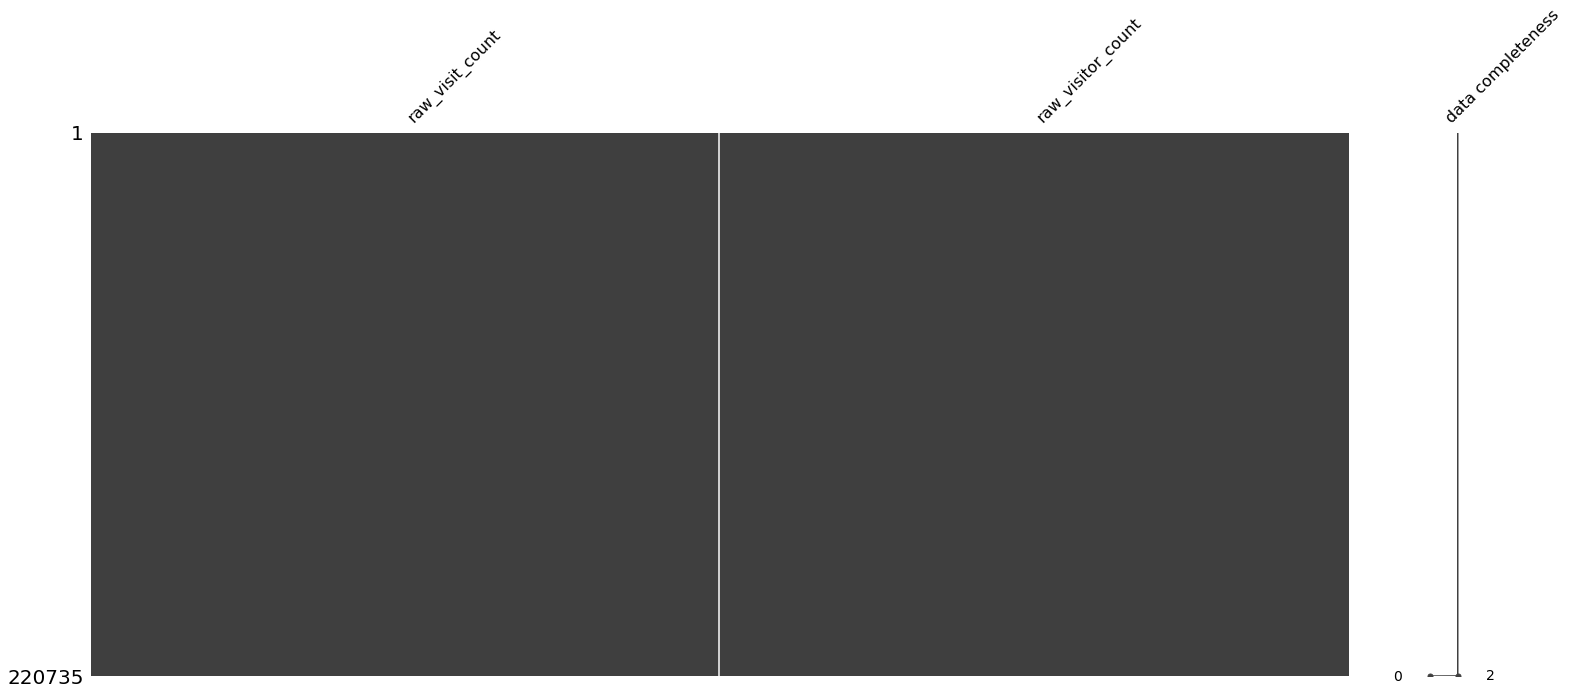

In [26]:
msno.matrix(data[['raw_visit_count','raw_visitor_count']], labels=True)

处理后

In [27]:
data[['raw_visit_count','raw_visitor_count']].head()

,raw_visit_count,raw_visitor_count
0,75122.0,18314.0
1,95649.0,38942.0
2,14009.0,3039.0
3,128169.0,25418.0
4,51453.0,9499.0


In [28]:
notnulls = data[['raw_visit_count','raw_visitor_count']].loc[data['raw_visit_count'].notnull(),'raw_visit_count']

In [29]:
isnulls = data[['raw_visit_count','raw_visitor_count']].loc[data['raw_visit_count'].isnull(),'raw_visit_count']

In [30]:
len(isnulls)

106

In [31]:
import random
df.loc[df['raw_visit_count'].isnull(),'raw_visit_count'] = random.sample(list(notnulls),106)

D:\soft\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
1 - (df['raw_visit_count'].describe().T["count"]) / len(df['raw_visit_count'])

0.0

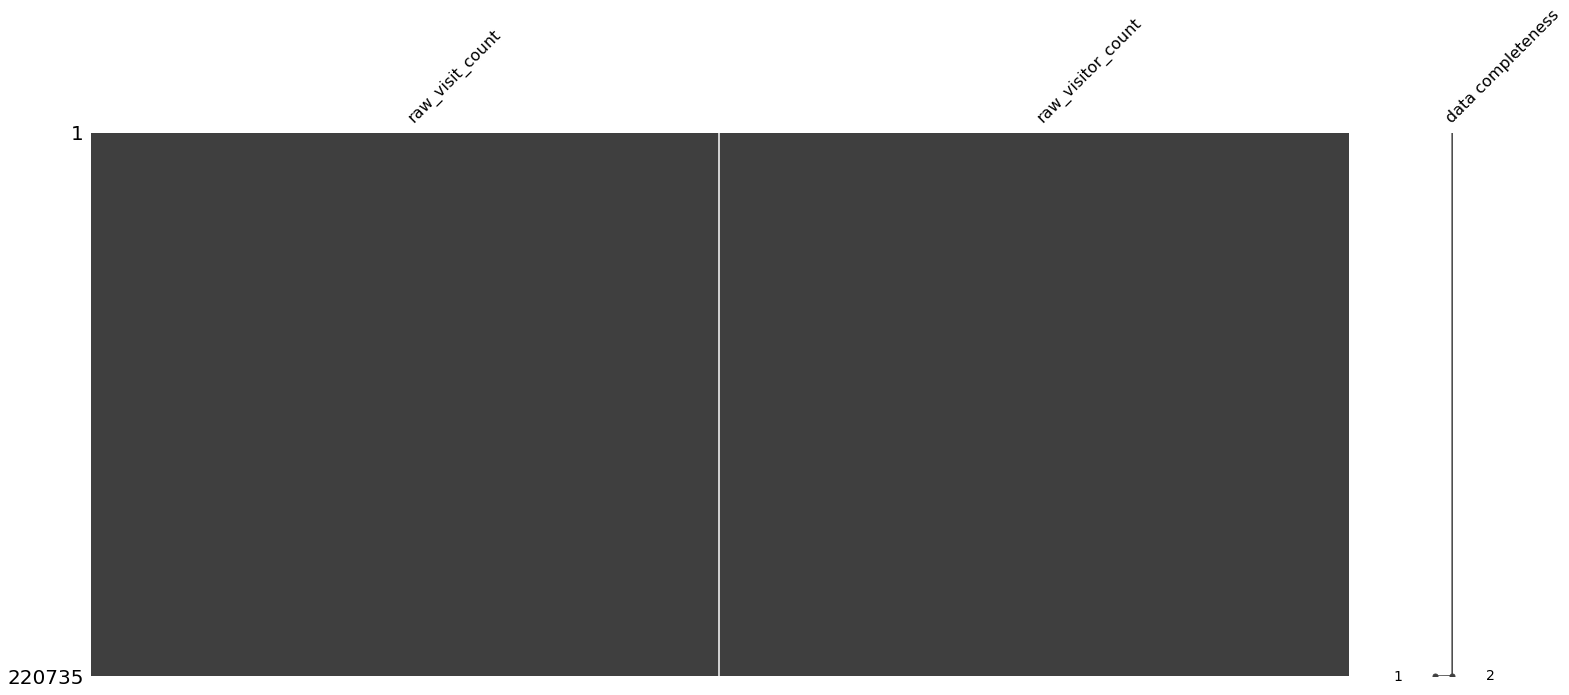

In [33]:
msno.matrix(df[['raw_visit_count','raw_visitor_count']], labels=True)

## 第四种方法 使用对象之间相似性填补缺失值

处理前

In [34]:
data['raw_visit_count'].describe()
1 - (data['raw_visit_count'].describe().T["count"]) / len(data)

0.0004802138310644466

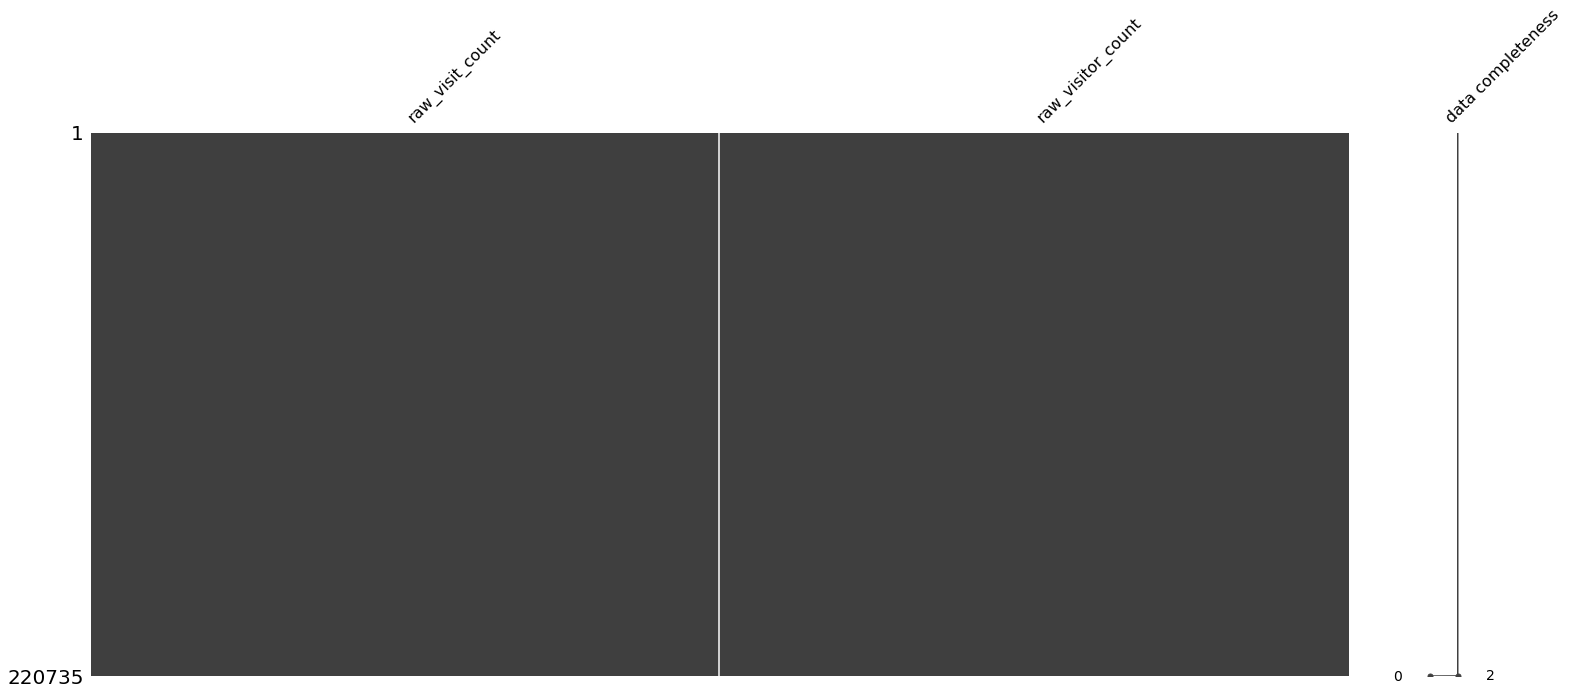

In [35]:
msno.matrix(data[['raw_visit_count','raw_visitor_count']], labels=True)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
data['raw_visitor_count'].fillna(data['raw_visitor_count'].mean(),inplace=True)
train = data[['raw_visit_count','raw_visitor_count']].loc[data['raw_visit_count'].notnull()]
test = data[['raw_visit_count','raw_visitor_count']].loc[data['raw_visit_count'].isnull()]

In [39]:
import numpy as np
trainx = np.array(train.raw_visitor_count).reshape(-1,1)
testx = np.array(test.raw_visitor_count).reshape(-1,1)
trainy = np.array(train.raw_visit_count).reshape(-1,1)

In [40]:
model.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
data.loc[data['raw_visit_count'].isnull(),'raw_visit_count'] = model.predict(testx)

In [42]:
1 - (data['raw_visit_count'].describe().T["count"]) / len(data['raw_visit_count'])

0.0

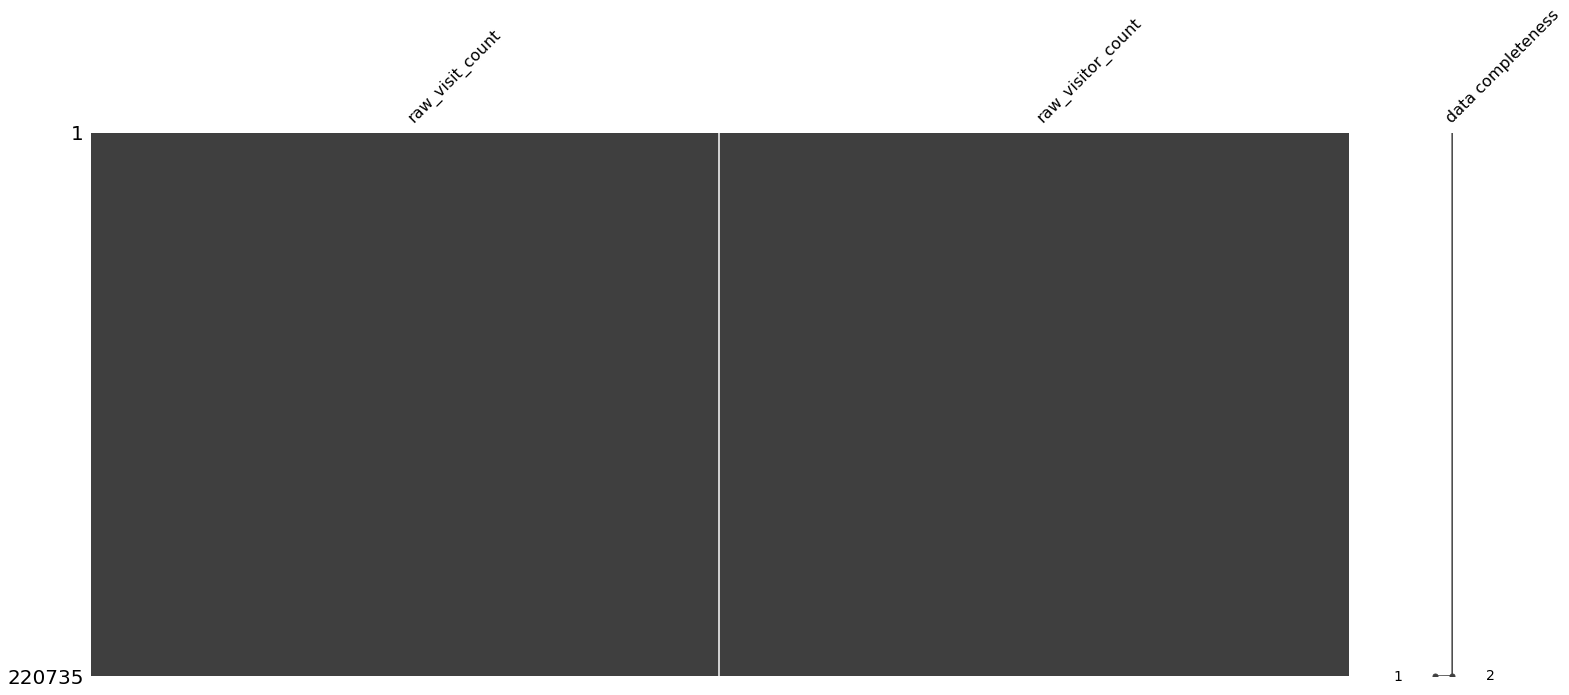

In [43]:
msno.matrix(df[['raw_visit_count','raw_visitor_count']], labels=True)